In [6]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.special
import more_itertools as mit

In [7]:
def busqueda_secuencial(lista, valor):
    for i in lista:
        if i == valor:
            return "Valor encontrado " + str(valor) 
        else:
            return "Valor no encontrado " + str(valor) 


def busqueda_binaria(lista, valor):
    
    mid = len(lista)//2

    if len(lista) < 3:
        return busqueda_secuencial(lista, valor)
    elif valor == lista[mid]:
        return "Valor encontrado " + str(valor) 
    elif valor < lista[mid]:
        return busqueda_binaria(lista[:mid],valor)
    else:
        return busqueda_binaria(lista[mid:],valor)


def busqueda_ternaria(lista, valor):
    tercio1 = len(lista)//3
    tercio2 = 2*tercio1

    if len(lista) < 3:
        return busqueda_secuencial(lista, valor)
    elif valor == lista[tercio1] or valor == lista[tercio2]:
        return "Valor encontrado " + str(lista[tercio1])
    elif valor < lista[tercio1]:
        return busqueda_ternaria(lista[:tercio1],valor)
    elif valor < lista[tercio2]:
        return busqueda_ternaria(lista[tercio1:tercio2],valor)
    else:
        return busqueda_ternaria(lista[tercio2:],valor)

In [8]:
n_min = 10
n_max = 1000
st = 10
iteraciones = 10 # iteraciones del benchmark

t_bin = list()
for n in range(n_min, n_max, st):
    suma = 0
    for i in range(1, iteraciones):
        v = mit.random_combination(range(1, 10000), n)
        suma += timeit.timeit(lambda: busqueda_binaria(v,5000), number = 1)
    promedio = suma / iteraciones
    t_bin.append(promedio)
    


Text(0, 0.5, 'costo')

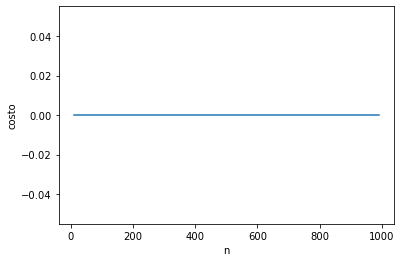

In [10]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_bin, label = 'bin')
plt.xlabel('n')
plt.ylabel('costo')
